In [50]:
import os
import yaml
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from collections import defaultdict

In [17]:
brands_yml = r'..\brands\brands.yml'
brands = yaml.load(open(brands_yml), Loader=yaml.FullLoader)
brands

[{'company': 'MVP', 'brands': [{'brand': 'Axiom'}, {'brand': 'Streamline'}]},
 {'company': 'Lone Star',
  'brands': [{'brand': 'Sacred'}, {'brand': 'Hooligan'}]},
 {'company': 'Gateway',
  'brands': [{'brand': 'Above Ground Level'}, {'brand': 'Black Zombie'}]},
 {'company': 'Innova'},
 {'company': 'Discraft'},
 {'company': 'House of Discs',
  'brands': [{'brand': 'Latitude 64'},
   {'brand': 'Kastaplast'},
   {'brand': 'Discmania'},
   {'brand': 'Westside'},
   {'brand': 'Dynamic Discs'}]},
 {'company': 'Prodigy'},
 {'company': 'Mint', 'manufacturer': 'MVP'},
 {'company': 'Thought Space Athletics', 'manufacturer': 'MVP'},
 {'company': 'Wild Discs', 'manufacturer': 'MVP'},
 {'company': 'Jester', 'manufacturer': 'MVP'},
 {'company': 'DGA', 'manufacturer': 'Discraft'},
 {'company': 'Millenium',
  'manufacturer': 'Innova',
  'brands': [{'brand': 'Hyzerbomb'}]},
 {'company': 'Infinite', 'manufacturer': 'Innova'}]

defaultdict(<class 'list'>, {0: ['MVP', 'Axiom', 'Streamline'], 1: ['Lone Star', 'Sacred', 'Hooligan'], 2: ['Gateway', 'Above Ground Level', 'Black Zombie'], 3: ['Innova'], 4: ['Discraft'], 5: ['House of Discs', 'Latitude 64', 'Kastaplast', 'Discmania', 'Westside', 'Dynamic Discs'], 6: ['Prodigy'], 7: ['Mint'], 8: ['Thought Space Athletics'], 9: ['Wild Discs'], 10: ['Jester'], 11: ['DGA'], 12: ['Millenium', 'Hyzerbomb'], 13: ['Infinite']})


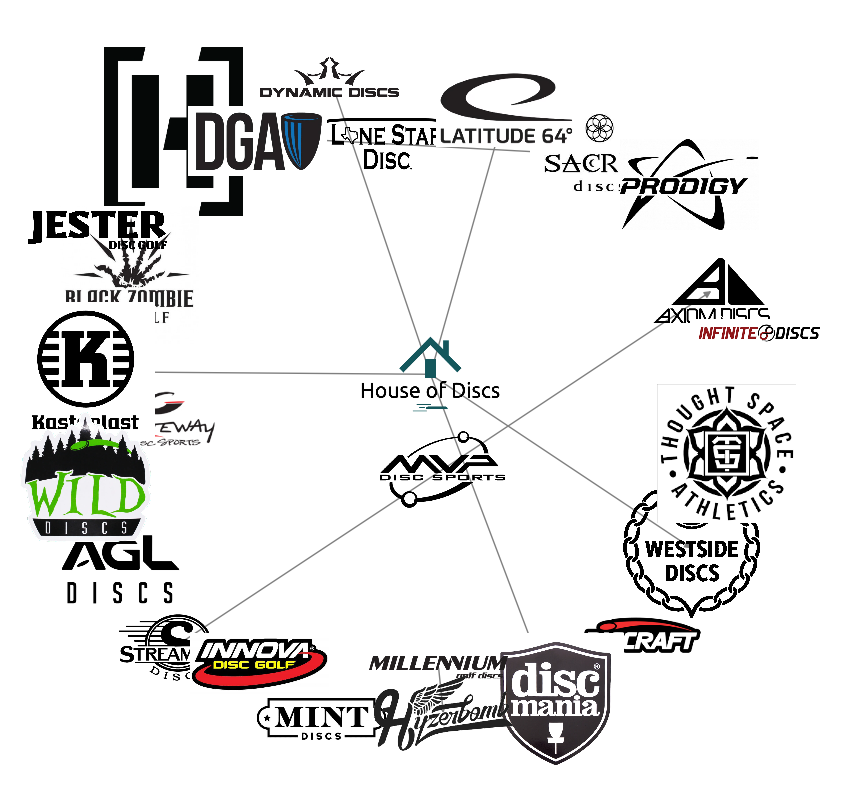

In [56]:
# Create a new graph
G = nx.DiGraph()

# Add nodes and edges to the graph
community_to_node = defaultdict(list)
for community_id, company_data in enumerate(brands):
    company_name = company_data["company"]
    G.add_node(company_name)
    community_to_node[community_id].append(company_name)
    if 'brands' in company_data:
        for brand in company_data["brands"]:
            brand_name = brand["brand"]
            G.add_node(brand_name)
            G.add_edge(company_name, brand_name)
            community_to_node[community_id].append(brand_name)

node_to_community = {node: community_id for community_id, nodes in community_to_node.items() for node in nodes}

print(community_to_node)
# Visualize the graph
pos = nx.spring_layout(G, seed=42) #, pos=node_to_community)  # Layout the graph using the spring layout algorithm

# Draw the nodes and edges
# Place logos at nodes
fig, ax = plt.subplots(figsize=(10, 10))

for node in G.nodes:
    # nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color="blue")
    img = mpimg.imread(os.path.join('..', 'brands', 'logos', node + '.png'))
    # scale image to width of 100 pixels, but preserve aspect ratio
    imagebox = OffsetImage(img, zoom=100/img.shape[1])
    ab = AnnotationBbox(imagebox, pos[node], frameon=False)
    ax.add_artist(ab)
    
nx.draw(G, pos, with_labels=False, node_size=0, edge_color="grey", ax=ax)

# Display the plot
plt.show()


